In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xlrd
import csv
from math import exp
from math import sqrt
from math import pi
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Question 1

First we split the training data according to the classes:

##### Apartment:

| ID | Local Price | Bathrooms | Land Area | Living Area | Garages | Rooms | Bedrooms | Age of Home |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1 |4.9176| 1 | 3.472 | 0.998 | 1 | 7 | 4 | 42 |					
| 4 |4.5573| 1 | 4.05 | 1.232 | 1 | 6 | 3 | 54 |
| 5 |5.0597| 1 | 4.455 | 1.121 | 1 | 6 | 3 | 42 |
| 10 |14.4598| 2.5 |	12.8 | 3 | 2 | 9 | 5 | 14 |
| 15 |5.05| 1 | 5 | 1.02 | 0 | 5 | 2 | 46 |							
| 17 |8.2464| 1.5 | 5.15 | 1.664 | 2 | 8 | 4 | 50 |
| 20 |9.0384| 1 | 7.8 | 1.5 | 1.5 | 7 | 3 | 23 |

##### Condo:

| ID | Local Price | Bathrooms | Land Area | Living Area | Garages | Rooms | Bedrooms | Age of Home |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 3 |4.5429| 1 | 2.275 | 1.175 | 1 | 6 | 3 | 40 |					
| 6 |3.891| 1 | 4.455 | 0.988 | 1 | 6 | 3 | 56 |
| 7 |5.898| 1 | 5.85 | 1.24 | 1 | 7 | 3 | 51 |
| 9 |16.4202| 2.5 | 9.8 | 3.42 | 2 | 10 | 5 | 42 |
| 14 |5.9592| 1 | 6.666 | 1.121 | 2 | 6 | 3 | 32 |					
| 19 |7.7841| 1.5 | 7.102 | 1.376 | 1 | 6 | 3 | 32 |

##### House 
| ID | Local Price | Bathrooms | Land Area | Living Area | Garages | Rooms | Bedrooms | Age of Home |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 2 | 5.0208 | 1 | 3.531 | 1.5 | 2 | 7 | 4 | 62 |
| 8 | 5.6039 | 1 | 9.52 | 1.501 | 0 | 6 | 3 | 32 |
| 11 | 5.8282 | 1 | 6.435 | 1.225 | 2 | 6 | 3 | 32 |
| 12 | 5.3003 | 1 | 4.9883 | 1.552 | 1 | 6 | 3 | 30 |
| 13 | 6.2712 | 1 | 5.52 | 0.975 | 1 | 5 | 2 | 30 |
|16 | 5.6039 | 1 | 9.52 | 1.501 | 0 | 6 | 3 | 32 |
| 18 | 6.6969 | 1.5 | 6.902 | 1.488 | 1.5 | 7 | 3 | 22 |

#### Probability Calculations: 

First we calculate the probability of each class: 

$P(Appartment) = 7/20$, $P(Condo) = 6/20$, and $P(House) = 7/20$

Since the features are continuous values, I'll use a gaussian distribution to compute the conditional probabilities. 
For each of the three classes we need to compute the mean and variance of each feature, then the conditional probabilities using

$\hat{P}(X_{j}|C=c_{i}) = \frac{1}{\sqrt{2\pi\sigma_{ji}^{2}}}\exp\left(-\frac{(X_{j}-\mu_{ji})^{2}}{2\sigma_{ji}^{2}}\right),$

where 

$\mu_{ij}=$ mean of the attributes $X_{j}$ for which $C=c_{i}$, and 

$\sigma_{ij} = $ standard deviation of the attributes $X_{j}$ for which $C=c_{i}$.

As an example, let's take the features "Local Price" and "Age of Home" from the "Apartment" class. The mean and variances are $\mu_{11} = 7.33$ and $\sigma_{11}^{2} = 13.08$; and $\mu_{81} = 31.71$ and $\sigma_{81}^{2} = 215.57$, respectively. 

For the other two classes, the mean and variances of the same features are: $\mu_{12} = 7.42$ and $\sigma_{12}^{2} = 21.26$; and $\mu_{82} = 39.67$ and $\sigma_{82}^{2} = 194.67$, for the Condo class; and $\mu_{13} = 5.76$ and $\sigma_{13}^{2} = 0.33$; and $\mu_{83} = 34.29$ and $\sigma_{83}^{2} = 161.90$, for the House class. 

The final result from the trining stage will be two $8\times 3$ matrices containing the means and variances of the features with respect to each class. This matrices can later be use to calculate the probabilities of the test features. The matrices are given below:


In [20]:
# Means
mu_ij = np.array([[7.33,1.29,6.10,1.51,1.21,6.86,3.43,38.71],[7.42,1.33,6.02,1.55,1.33,6.83,3.33,39.67],[5.76,1.07,6.63,1.39,1.07,6.14,3,33.29]])
print("mu = ", mu_ij.T)

# Variances
sigma_sq_ij = np.array([[13.07,0.32,10.62,0.49,0.48,1.81,0.95,215.57], [21.26,0.37,6.48, 0.85,0.27,2.57,0.67,194.67] ,[0.33,0.036,5.06,0.05, 0.70,0.48,0.33,161.90]])
print("sigma_sq = ",sigma_sq_ij.T)

mu = mu_ij.T
sigma_sq = sigma_sq_ij.T


#P(C)
prob_apt = 7/20
prob_condo = 6/20
prob_house = 7/20

mu =  [[ 7.33  7.42  5.76]
 [ 1.29  1.33  1.07]
 [ 6.1   6.02  6.63]
 [ 1.51  1.55  1.39]
 [ 1.21  1.33  1.07]
 [ 6.86  6.83  6.14]
 [ 3.43  3.33  3.  ]
 [38.71 39.67 33.29]]
sigma_sq =  [[1.3070e+01 2.1260e+01 3.3000e-01]
 [3.2000e-01 3.7000e-01 3.6000e-02]
 [1.0620e+01 6.4800e+00 5.0600e+00]
 [4.9000e-01 8.5000e-01 5.0000e-02]
 [4.8000e-01 2.7000e-01 7.0000e-01]
 [1.8100e+00 2.5700e+00 4.8000e-01]
 [9.5000e-01 6.7000e-01 3.3000e-01]
 [2.1557e+02 1.9467e+02 1.6190e+02]]


In [22]:
# Probability density function
def prob(x, mu, sigma_sq):
    exponent = exp(-((x-mu)**2 / (2 * sigma_sq )))
    return (1 / (sqrt(2 * pi * sigma_sq**2))) * exponent

In [30]:
#Load Test data
loc = ("content/drive/MyDrive/Asssignment4_Data.xls")
#loc = ("/content/drive/MyDrive/Asssignment4_Data.xls") #for Colab
wb = pd.read_excel(loc,sheet_name='Test') 
#sheet = wb.sheet_by_index(1)

class_arr = np.array(["Apartment","Condo","House"])
vec = []
p_c1_x = 1.0
p_c2_x = 1.0
p_c3_x = 1.0


for i in range(5):
    #vec = sheet.row_values(i+1) #Read each test example
    vec = wb.iloc[i]
    for j in range(8):
        x = vec[j+1]
        p_c1_x = p_c1_x * prob(x,mu[j,0],sigma_sq[j,0]) #Compute conditional probabilites P(X = x_j|C = Apt)
        p_c2_x = p_c2_x * prob(x,mu[j,1],sigma_sq[j,1]) #Compute conditional probabilites P(X = x_j|C = Condo)
        p_c3_x = p_c3_x * prob(x,mu[j,2],sigma_sq[j,2]) #Compute conditional probabilites P(X = x_j|C = House)
    p_c1_x = p_c1_x * prob_apt #Compute P(Apt|X)
    p_c2_x = p_c2_x * prob_condo #Compute P(Condo|X)
    p_c3_x = p_c3_x * prob_house #Compute P(House|X)
    #Normalize to get probabilities
    P_C1 =  p_c1_x / (p_c1_x + p_c2_x + p_c3_x ) 
    P_C2 =  p_c2_x / (p_c1_x + p_c2_x + p_c3_x )
    P_C3 =  p_c3_x / (p_c1_x + p_c2_x + p_c3_x )
    print("House ID:", vec[0])
    print("Probability of Apartment = ",P_C1)
    print("Probability of Condo = ", P_C2)
    print("Probability of House = ", P_C3)
    #MAP rule
    mx = np.array([P_C1,P_C2,P_C3])
    max_p = mx.argmax()
    print("Prediction = ", class_arr[max_p] ,"| True label = ",vec[9])

House ID: 24
Probability of Apartment =  0.0003494578411436606
Probability of Condo =  0.00029248811853431397
Probability of House =  0.9993580540403221
Prediction =  House | True label =  Apartment
House ID: 25
Probability of Apartment =  0.4419368838705025
Probability of Condo =  0.19836332124354725
Probability of House =  0.3596997948859503
Prediction =  Apartment | True label =  House
House ID: 26
Probability of Apartment =  0.13563574312991142
Probability of Condo =  0.023202025377574688
Probability of House =  0.8411622314925138
Prediction =  House | True label =  House
House ID: 27
Probability of Apartment =  0.8744960075307107
Probability of Condo =  0.1255020590488274
Probability of House =  1.933420461939848e-06
Prediction =  Apartment | True label =  Apartment
House ID: 28
Probability of Apartment =  0.8691628831093535
Probability of Condo =  0.13083711689064645
Probability of House =  6.157131605671797e-28
Prediction =  Apartment | True label =  Apartment


# Question 2

In [58]:
#Import CSV data for train
train_data = pd.read_csv("content/drive/MyDrive/Data_train.csv")
test_data = pd.read_csv("content/drive/MyDrive/Data_test.csv")
#train_data = pd.read_csv("/content/drive/MyDrive/Data_train.csv") #for Colab
#train_test = pd.read_csv("/content/drive/MyDrive/Data_test.csv") #for Colab

#Convert class into integer
d = {'Apartment': 0, 'Condo': 1, 'House': 2}
train_data['Construction type'] = train_data['Construction type'].map(d)
test_data['Construction type'] = test_data['Construction type'].map(d)

#Defines features and targets
features = ['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']

X = train_data[features]
Y = train_data['Construction type']

print(X)
print(Y)

x = test_data[features]
y = test_data['Construction type']

    Local Price  Bathrooms  Land Area  Living area  # Garages  # Rooms  \
0        4.9176        1.0     3.4720        0.998        1.0        7   
1        5.0208        1.0     3.5310        1.500        2.0        7   
2        4.5429        1.0     2.2750        1.175        1.0        6   
3        4.5573        1.0     4.0500        1.232        1.0        6   
4        5.0597        1.0     4.4550        1.121        1.0        6   
5        3.8910        1.0     4.4550        0.988        1.0        6   
6        5.8980        1.0     5.8500        1.240        1.0        7   
7        5.6039        1.0     9.5200        1.501        0.0        6   
8       16.4202        2.5     9.8000        3.420        2.0       10   
9       14.4598        2.5    12.8000        3.000        2.0        9   
10       5.8282        1.0     6.4350        1.225        2.0        6   
11       5.3003        1.0     4.9883        1.552        1.0        6   
12       6.2712        1.0     5.5200 

[Text(0.5, 0.9166666666666666, 'X[7] <= 36.0\ngini = 0.665\nsamples = 20\nvalue = [7, 6, 7]'),
 Text(0.3, 0.75, 'X[0] <= 8.411\ngini = 0.56\nsamples = 10\nvalue = [2, 2, 6]'),
 Text(0.2, 0.5833333333333334, 'X[7] <= 19.5\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3, 0.4166666666666667, 'X[3] <= 1.173\ngini = 0.245\nsamples = 7\nvalue = [0, 1, 6]'),
 Text(0.2, 0.25, 'X[7] <= 31.0\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.4, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.7, 0.75, 'X[0] <= 4.55\ngini = 0.58\nsamples = 10\nvalue = [5, 4, 1]'),
 Text(0.6, 0.5833333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.58333333

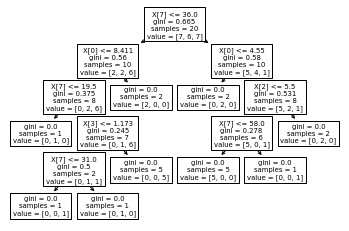

In [129]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)
tree.plot_tree(dtree)

### Q1

Use the default parameters. 

a. What is the accuracy on the training set? 


b. What is the accuracy on the test set?

In [130]:
# Predicton on train
y_pred = dtree.predict(X)
print("Predicted values on training set:")
print(y_pred)

print ("Accuracy on training set : ", accuracy_score(Y,y_pred)*100)

Predicted values on training set:
[0 2 1 0 0 1 1 2 1 0 2 2 2 1 0 2 0 2 1 0]
Accuracy on training set :  100.0


In [131]:
# Predicton on test
y_pred = dtree.predict(x)
print("Predicted values on test set:")
print(y_pred)

print ("Accuracy on test set : ", accuracy_score(y,y_pred)*100)

print("Report : ", classification_report(y, y_pred))

Predicted values on test set:
[1 1 1 0 0]
Accuracy on test set :  40.0
Report :                precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         2

    accuracy                           0.40         5
   macro avg       0.33      0.22      0.27         5
weighted avg       0.60      0.40      0.48         5



/home/alberto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alberto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alberto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alberto/.local/lib/python3.10/site-p

### Q2 

What is the effect of restricting the maximum depth of the tree? Try different depths and find the best value.

As the depth increases, the accuracy on the test data decreases. The higher accuracy is reached when the depth = 2.


In [139]:
dtree_new = DecisionTreeClassifier(max_depth=2)
dtree_new = dtree_new.fit(X, Y)

# Predicton on test
y_pred = dtree_new.predict(x)
print("Predicted values on test set:")
print(y_pred)

print ("Accuracy on test set : ", accuracy_score(y,y_pred)*100)
print("Report : ", classification_report(y, y_pred))

Predicted values on test set:
[1 1 2 0 0]
Accuracy on test set :  60.0
Report :                precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0
           2       1.00      0.50      0.67         2

    accuracy                           0.60         5
   macro avg       0.67      0.39      0.49         5
weighted avg       1.00      0.60      0.75         5



/home/alberto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alberto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alberto/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Q3 

Why does restricting the depth have such a strong effect on the classifier performance?


Because as the depth increases, the model learns all the data and tends to overfit. Restricting the depth reduces the overfitting and the model has more variance.


### Q4 

Visualize the resulting tree. Perform the inference on this tree manually (i.e. show/trace the path taken towards classification) and provide a classification for the following example:

| X | Value |
| --- | --- |
|Local Price | 9.0384 |
|Bathrooms | 1 |
|Land area | 7.8 |
|Living area | 1.5 |
|Garages | 1.5 |
|Rooms | 7 |
|Bedrooms | 3 |
|Age of home | 23 |

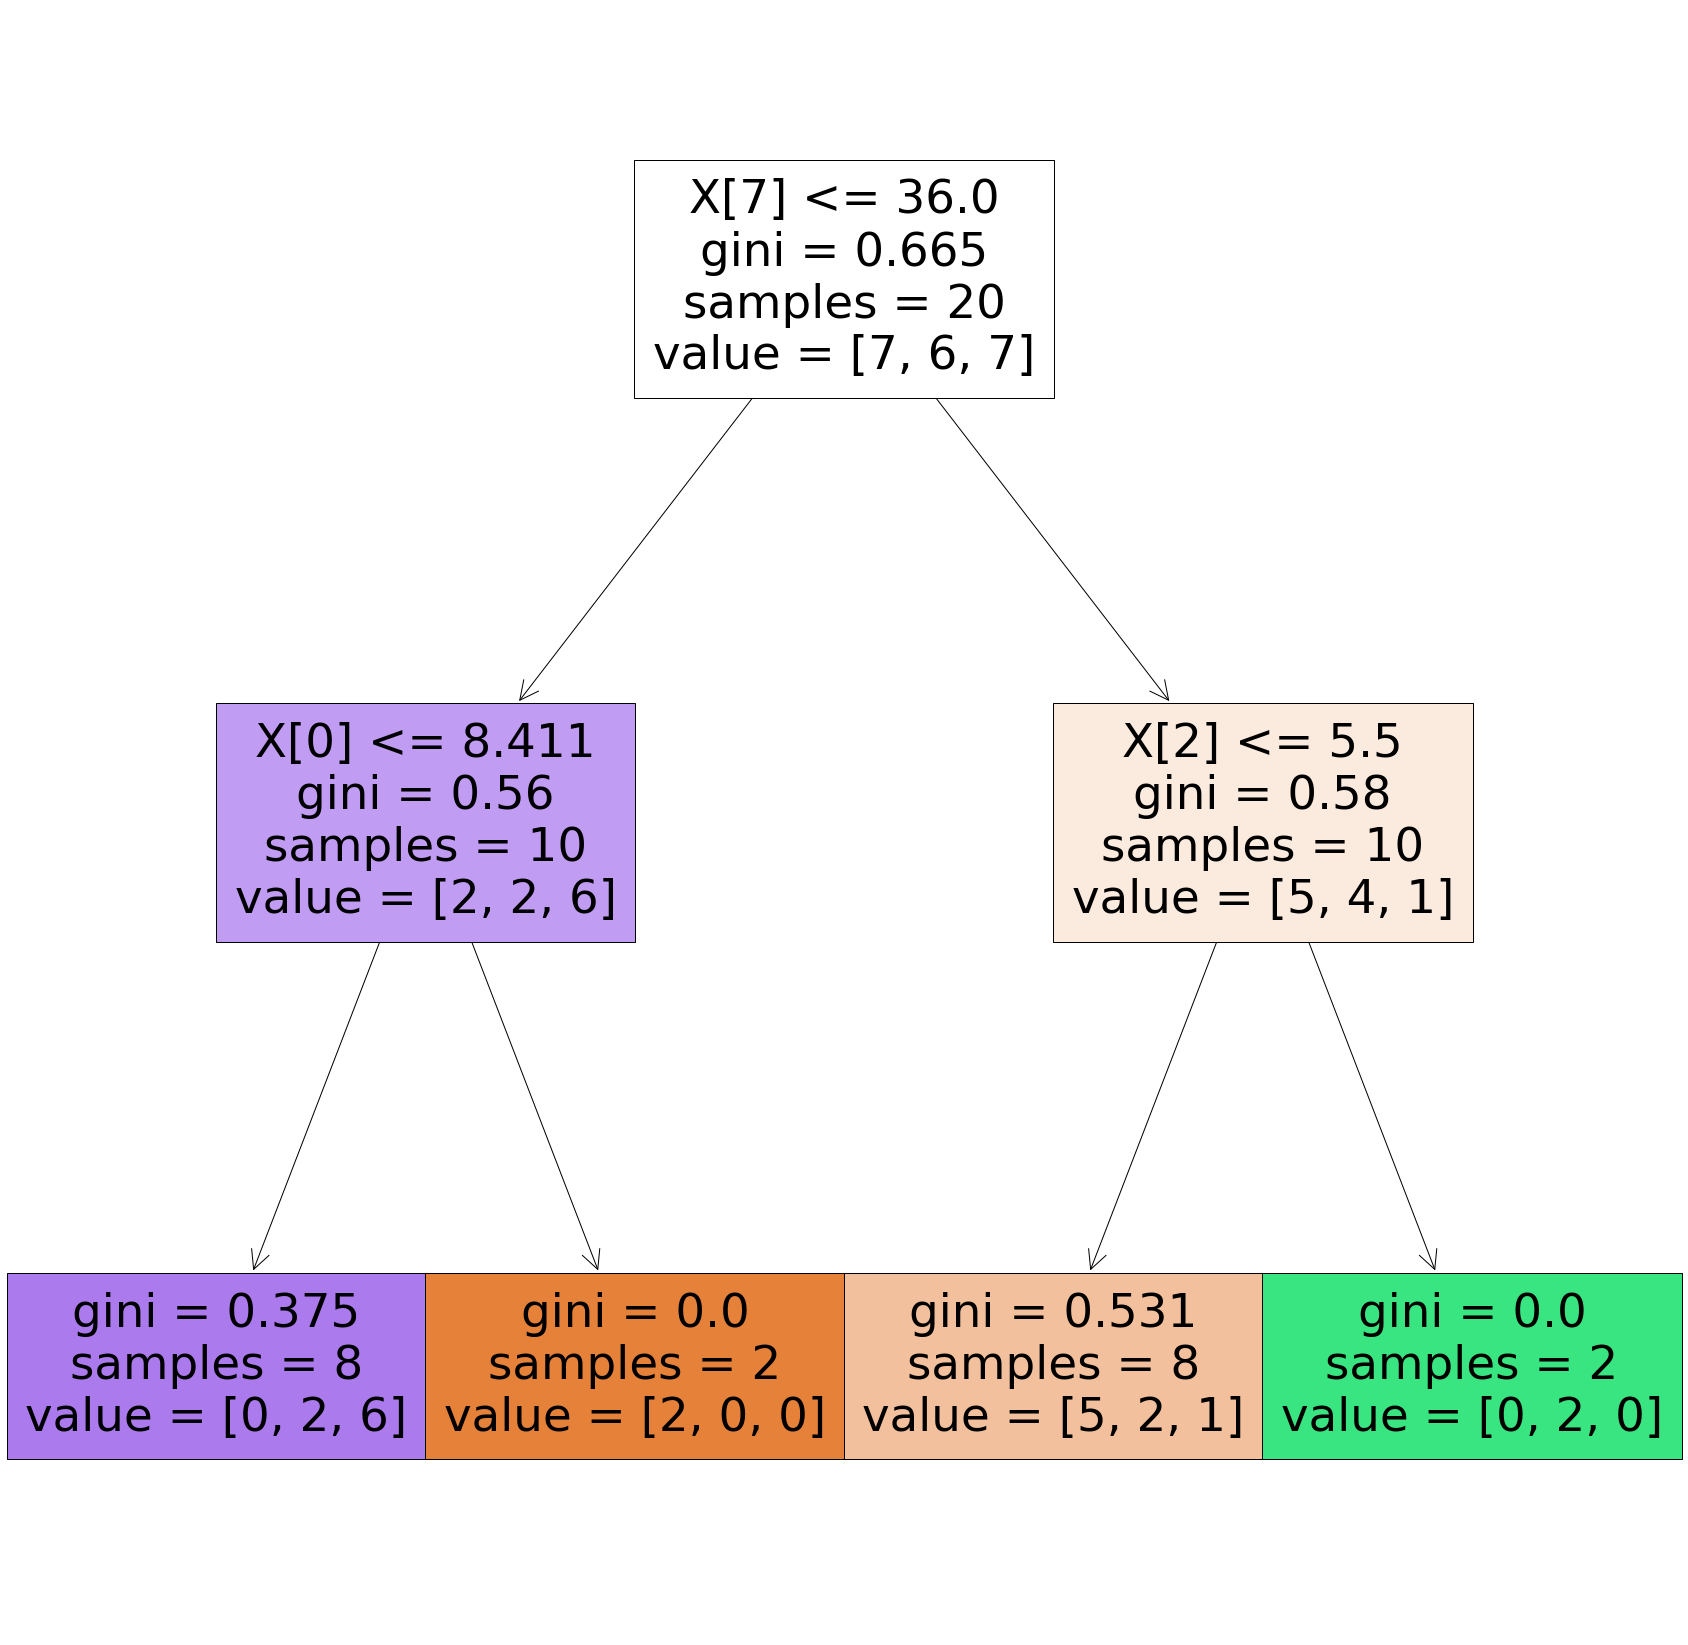

In [140]:
_, ax = plt.subplots(figsize=(30,30)) # Resize figure
tree.plot_tree(dtree_new, filled=True, ax=ax)
plt.show()

-  Step 1 : $X[7]$ represents the age of home. Since for the example given "age of home" is less than $36.0$, we have to follow the left side of the branch. This leads us to $X[0]$ which is the local price.
-  Step 2: Since the local price of the example is greater than $8.411$, we have to follow the right side of the branch. This leads us to the final leaf.
-  Step 3: The final leaf contains two samples and both were assigned to the label "0", which corresponds to the "Apartment" class. Hence, the prediction is "Apartment".

# Question 3

In [148]:
#k-neares neighbor with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

In [149]:
train_accuracy = knn.score(X, Y)
test_accuracy = knn.score(x, y)

print("Accuracy on train data: ",train_accuracy)
print("Accuracy on test data: ", test_accuracy)

Accuracy on train data:  0.6
Accuracy on test data:  0.2


In [164]:
# Loop over K values
neighbors = np.arange(1,6)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn_new = KNeighborsClassifier(n_neighbors=k,algorithm='ball_tree')
    knn_new.fit(X, Y)
    
    # Compute training and test data accuracy
    train_acc[i] = knn_new.score(X, Y)
    test_acc[i] = knn_new.score(x, y)

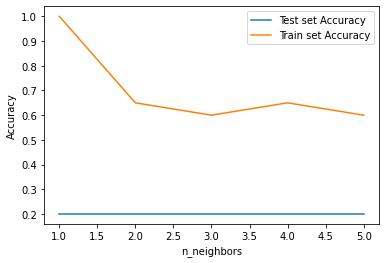

In [165]:
plt.plot(neighbors, test_acc, label = 'Test set Accuracy')
plt.plot(neighbors, train_acc, label = 'Train set Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Comments


